Using the Burr3 model of response, we simulate the response of low pT jets, in order to determine which is the best correcion factor: 1/mean? 1/mode? etc

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm

import numpy as np
import scipy.stats
from scipy.optimize import minimize

from collections import OrderedDict
import math
from itertools import izip
from copy import deepcopy

In [2]:
mpl.rcParams['figure.figsize'] = (9.0, 5.0)  # default size of plots
mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 16

In [114]:
# fit params from that othe rnotebook investigating diff fit funcs
frozen_fit = scipy.stats.burr(3.7989036602894894, 0.57362014248279913, 
                             loc=0.00912127339789, scale=0.500232499187)
r = frozen_fit.rvs(size=100000)

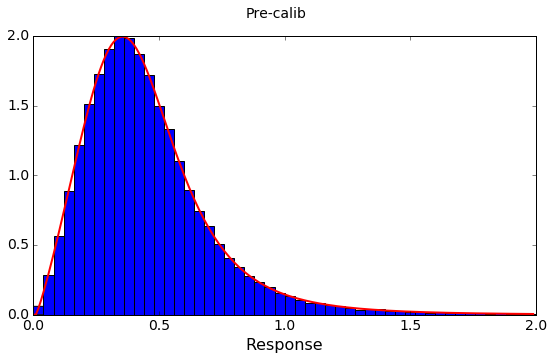

In [117]:
_ = plt.hist(r, bins=50, range=[0,2], normed=True)
xvals = np.arange(0, 2, 0.01)
plt.plot(xvals, frozen_fit.pdf(xvals), 'r', linewidth=2)
plt.xlabel('Response')
plt.suptitle('Pre-calib')

Applying factor 2.17602258184


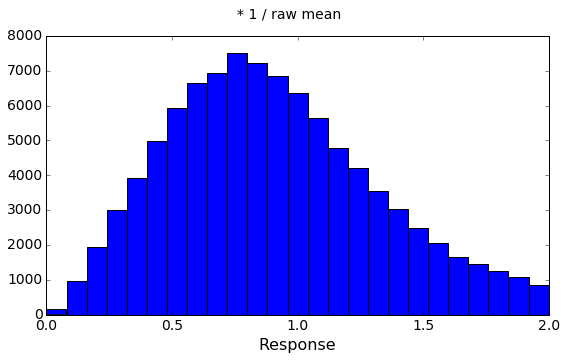

In [94]:
r_apply_raw_mean = r/np.mean(r)
print 'Applying factor', 1./np.mean(r)
_ = plt.hist(r_apply_raw_mean, bins=25, range=[0,2])
plt.xlabel('Response')
plt.suptitle('* 1 / raw mean')

Applying factor 2.17476662361


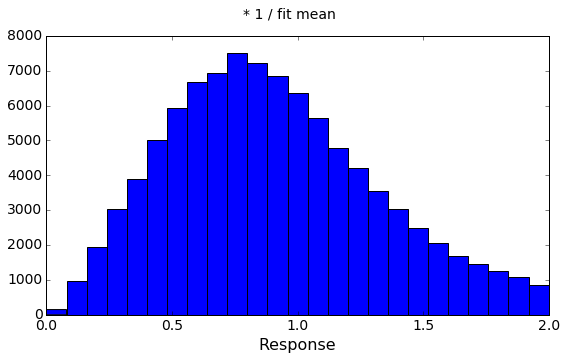

In [95]:
r_apply_mean = r / frozen_fit.stats(moments='m')
print 'Applying factor', 1. / frozen_fit.stats(moments='m')
_ = plt.hist(r_apply_mean, bins=25, range=[0,2])
plt.xlabel('Response')
plt.suptitle('* 1 / fit mean')

Applying factor 2.8182563714


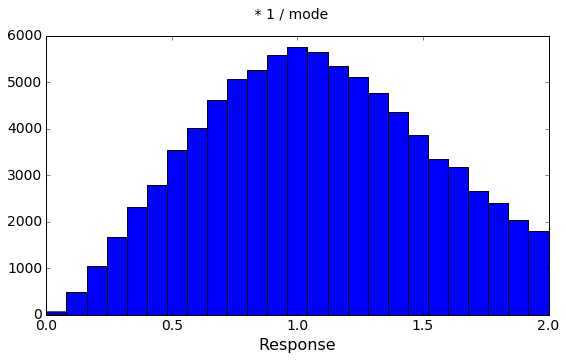

In [96]:
max_result = minimize(lambda x: -1. * frozen_fit.pdf(x), x0=.5)
mode = max_result.x[0]
print 'Applying factor', 1./mode
r_apply_mode = r/mode
_ = plt.hist(r_apply_mode, bins=25, range=[0,2])
plt.xlabel('Response')
plt.suptitle(' * 1 / mode')

Applying factor 2.44685060562


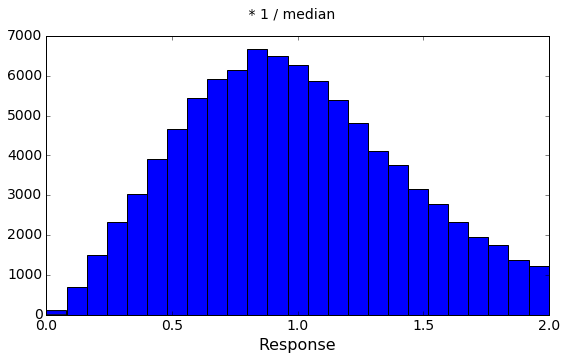

In [97]:
median = frozen_fit.median()
print 'Applying factor', 1./median
r_apply_median = r/median
_ = plt.hist(r_apply_median, bins=25, range=[0,2])
plt.xlabel('Response')
plt.suptitle(' * 1 / median')

In [119]:
r_inv = 1./r

In [120]:
inv_fit_results = scipy.stats.burr.fit(r_inv)
frozen_fit_inv = scipy.stats.burr(inv_fit_results[0], inv_fit_results[1], 
                                  loc=inv_fit_results[2], scale=inv_fit_results[3])

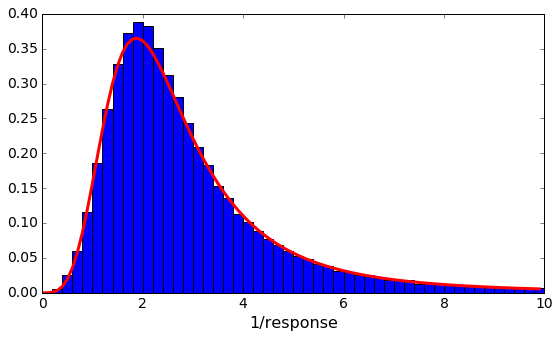

In [121]:
n, bins, patches = plt.hist(r_inv, bins=50, range=[0, 10], normed=True)
bin_cent = np.arange(0, 10, 0.1)
plt.plot(bin_cent, frozen_fit_inv.pdf(bin_cent), 'r', linewidth=3)
plt.xlabel('1/response')

Applying factor 1.87218900864


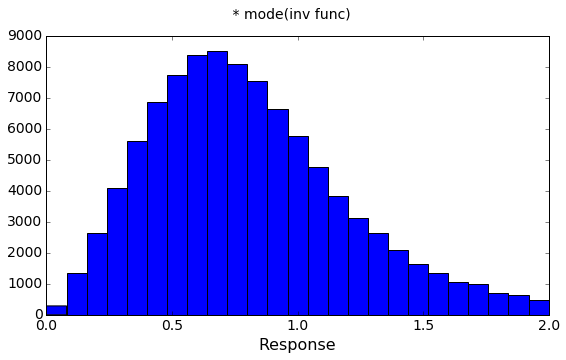

In [122]:
max_result_inv = minimize(lambda x: -1. * frozen_fit_inv.pdf(x), x0=1)
mode_inv = max_result_inv.x[0]
r_apply_inv_mode = r * mode_inv
print 'Applying factor', mode_inv
_ = plt.hist(r_apply_inv_mode, bins=25, range=[0,2])
plt.xlabel('Response')
plt.suptitle(' * mode(inv func)')

In [123]:
frozen_fit_inv.stats(moments='m')

array(3.1273487581493318)

Applying factor 3.12734875815


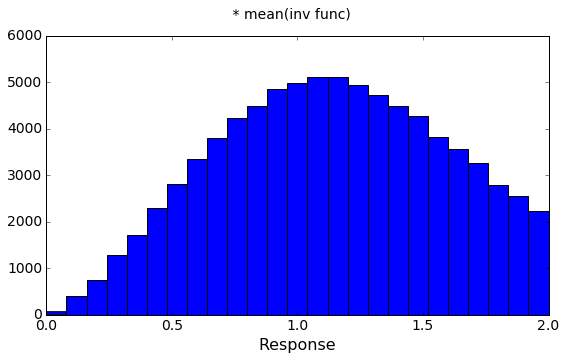

In [124]:
mean_inv = frozen_fit_inv.stats(moments='m')
r_apply_inv_mean = r * mean_inv
print 'Applying factor', mean_inv
_ = plt.hist(r_apply_inv_mean, bins=25, range=[0,2]) #, histtype='step', label='* mean(inv func)', linewidth=2)
# _ = plt.hist(r_apply_mode, bins=25, range=[0,2], histtype='step', label='/ mode(func)', linewidth=2)
plt.xlabel('Response')
plt.suptitle(' * mean(inv func)')
# plt.legend(loc='best')

Applying factor 2.46670249501


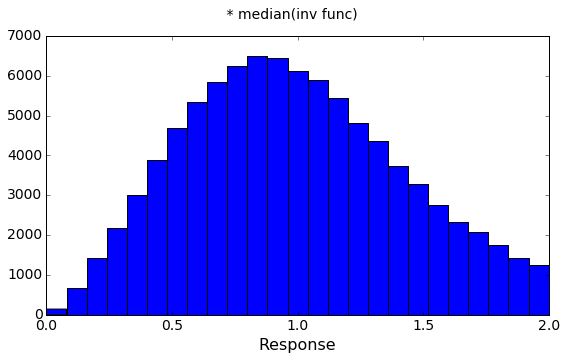

In [125]:
median_inv = frozen_fit_inv.median()
r_apply_inv_median = r * median_inv
print 'Applying factor', median_inv
_ = plt.hist(r_apply_inv_median, bins=25, range=[0,2])
plt.xlabel('Response')
plt.suptitle(' * median(inv func)')

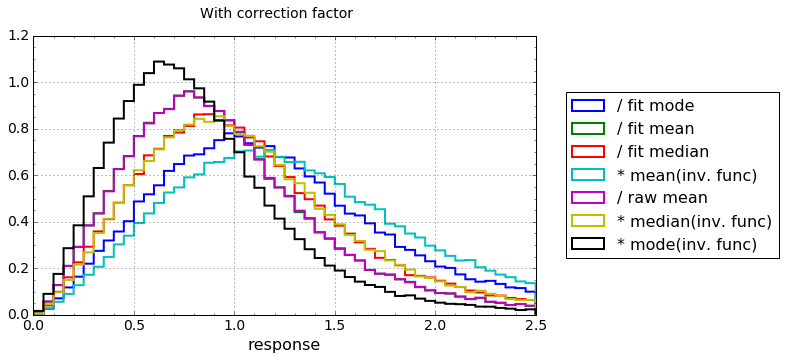

In [126]:
corrected = {
    '/ raw mean': r_apply_raw_mean,
    '/ fit mean': r_apply_mean,
    '/ fit mode': r_apply_mode,
    '/ fit median': r_apply_median,
    '* mode(inv. func)': r_apply_inv_mode,
    '* mean(inv. func)': r_apply_inv_mean,
    '* median(inv. func)': r_apply_inv_median
}
for name, arr in corrected.iteritems():
    plt.hist(arr, bins=50, range=[0,2.5], histtype='step', linewidth=2, label=name, normed=True)
plt.xlabel('response')
plt.legend(loc='center right', fontsize=16, bbox_to_anchor=(1.5, 0.5))
plt.suptitle('With correction factor')
plt.grid(which='major')
plt.minorticks_on()